In [67]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Unrecognized magic `%%shell`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


In [68]:
import Pkg;
Pkg.add("Dierckx")
Pkg.add("Plots")
Pkg.add("QuadGK")

using Dierckx, Plots, QuadGK

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


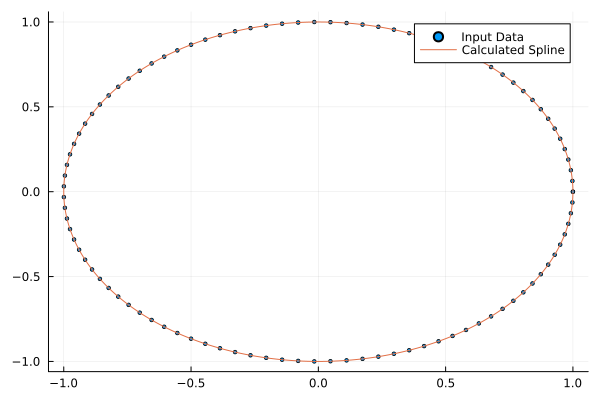

(3.141592573199696, 4.6779195073121116e-8)

In [74]:
function generate_circle_points(num_points)
    theta_values = range(0, 2π, length=num_points)
    x_values = cos.(theta_values)
    y_values = sin.(theta_values)
    return x_values, y_values
end

num_points = 100
x, y = generate_circle_points(num_points)

t = collect(1:100)
spl_x = Spline1D(t,x)
spl_y = Spline1D(t,y)

# Demoing evaluation here.

evaluated_pts_x = []
evaluated_pts_y = []
for i in 1:1000
  push!(evaluated_pts_x, spl_x(i/10))
  push!(evaluated_pts_y, spl_y(i/10))
end

scatter(x,y, label="Input Data", markersize=2)
display(plot!(evaluated_pts_x, evaluated_pts_y, label="Calculated Spline"))

# Time for Green's Theorem
# A = \oint_1^100 x dy.

function integrand(t)
  return spl_x(t) * derivative(spl_y, t)
end
area, error = quadgk(integrand, 1, 100)

In [75]:
function calculate_tumor_area(x,y,pts_sampled,smoothness)
  if(length(x) != length(y))
    println("Lengths of x, y are not equal, try again")
    return
  end
  t = collect(1:length(x))
  spl_x = Spline1D(t,x, s=smoothness)
  spl_y = Spline1D(t,y, s=smoothness)

  # Demoing evaluation here.
  evaluated_pts_x = []
  evaluated_pts_y = []
  for i in 1:pts_sampled * 10
    push!(evaluated_pts_x, spl_x(i/10))
    push!(evaluated_pts_y, spl_y(i/10))
  end
  scatter(x,y, label="Input Data", markersize=2)
  display(plot!(evaluated_pts_x, evaluated_pts_y, label="Calculated Spline"))

  # Time for Green's Theorem
  # A = \oint_1^{\text{length}(x)} x dy.

  function integrand(t)
    return spl_x(t) * derivative(spl_y, t)
  end
  # Orientation of the curve might be clockwise.
  area, error = quadgk(integrand, 1, length(x))
  println("Area of tumor is ", abs(area))
  println("Estimated error is ", error)
  return abs(area)
end

calculate_tumor_area (generic function with 1 method)

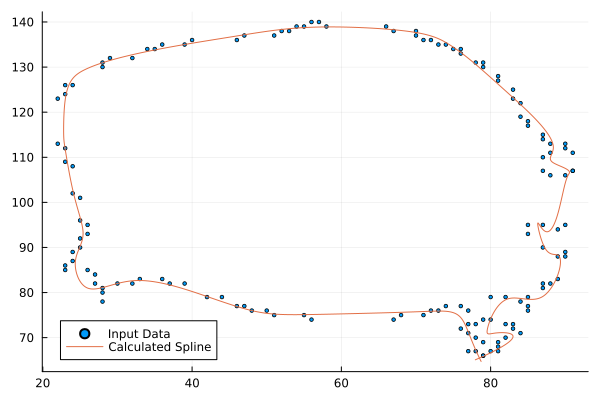

Area of tumor is 3628.864797294388
Estimated error is 5.296466151206991e-5


3628.864797294388

In [73]:
x = [79, 78, 77, 77, 76, 77, 77, 76, 74, 73, 72, 71, 68, 67, 56, 55, 51, 50, 48, 47, 46, 44, 42, 39, 37, 36, 33, 32, 30, 28, 28, 28, 27, 27, 26, 23, 23, 24, 24, 25, 25, 26, 26, 25, 25, 24, 24, 23, 23, 22, 22, 23, 23, 24, 28, 28, 29, 32, 34, 35, 36, 39, 40, 46, 47, 51, 52, 53, 54, 55, 56, 57, 58, 66, 67, 70, 70, 71, 72, 73, 74, 75, 76, 76, 78, 79, 79, 81, 81, 83, 83, 84, 84, 85, 85, 87, 87, 88, 90, 90, 91, 88, 87, 87, 88, 90, 91, 91, 90, 89, 87, 85, 85, 87, 89, 90, 90, 89, 88, 87, 87, 85, 85, 85, 84, 82, 80, 80, 79, 78, 78, 79, 81, 82, 82, 83, 83, 84, 81, 81, 80, 79]
y = [66, 67, 67, 71, 72, 73, 76, 77, 77, 76, 76, 75, 75, 74, 74, 75, 75, 76, 76, 77, 77, 79, 79, 82, 82, 83, 83, 82, 82, 80, 78, 81, 82, 84, 85, 85, 86, 87, 89, 90, 92, 93, 95, 96, 101, 102, 108, 109, 112, 113, 123, 124, 126, 126, 130, 131, 132, 132, 134, 134, 135, 135, 136, 136, 137, 137, 138, 138, 139, 139, 140, 140, 139, 139, 138, 138, 137, 136, 136, 135, 135, 134, 134, 133, 131, 131, 130, 128, 127, 125, 123, 122, 119, 118, 117, 115, 114, 113, 113, 112, 111, 111, 110, 107, 106, 106, 107, 107, 95, 94, 95, 95, 93, 90, 88, 88, 89, 83, 82, 82, 81, 79, 77, 76, 78, 79, 79, 74, 74, 73, 70, 69, 69, 70, 73, 73, 72, 71, 68, 67, 67, 66]
calculate_tumor_area(x,y,1000, 175)